In [168]:
import numpy as np
import pandas as pd 

import pylab as plt
import seaborn as sns
import regex as re

%matplotlib inline   #gráficos

UsageError: unrecognized arguments: #gráficos


In [169]:
df = pd.read_csv('attacks.csv', encoding='latin1')
df.columns = [x.lower() for x in df.columns] #poner los nombres de las columnas en minus
df

,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df.info(memory_usage='deep') #con esto se puede ver el tipo de dato. Hay MUY POCOS numéricos, no es bueno para gráfico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal (y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [171]:
num_df=df.select_dtypes(exclude='object') #estas van a ser las columnas con valores NUMÉRICOS

num_df.columns

Index(['year', 'original order'], dtype='object')

In [172]:
num_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


In [173]:
cat_df=df.select_dtypes(include='object') #Estas son las columnas con valores categóricos o NO numéricos
                #href formula significa 
cat_df.columns #voy a cambiar el tipo de dato a las columnas de: case number, date, age, time, case number.1 y case number.2

Index(['case number', 'date', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex ', 'age', 'injury', 'fatal (y/n)', 'time',
       'species ', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'unnamed: 22', 'unnamed: 23'],
      dtype='object')

In [174]:
#case number.1 y case number.2 son duplicados de case number
#El case number original parece que se genera a partir de la fecha, pero sirve para identificar. Puede ser 'id'. 
#En realidad hay 16 columnas útiles las otras 7 son 2 duplicadas, 2 de páginas web, 1 original order, 2 de troleo. 
#de las 16 útiles, 2 son numéricas. 
#Comprobar que todas las columnas tengan, cada una, el mismo tipo de valor

In [175]:
#cambiar nombre de columnas
df.rename(columns={'case number':'case_number', 'fatal (y/n)': 'fatal_yn', 'investigator or source': 'investigator_source', 'href formula': 'href_formula','case number.1':'case_n1' , 'case number.2': 'case_n2','original order':'original_order', 'unnamed: 22':'unnamed_2', 'unnamed: 23':'Unnamed_3'}, inplace=True)
df.head()   #Se podría haber hecho con .replace

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_source,pdf,href_formula,href,case_n1,case_n2,original_order,unnamed_2,Unnamed_3
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [176]:
#HACER DESPUÉS
#reemplazar nan por 0s
#df.Unnamed_22.replace(np.nan, value = 0.0, inplace = True)
#df.Unnamed_23.replace(np.nan, value = 0.0, inplace = True)

In [177]:
df.dropna(subset=['date'])   #recortar los valores nulos de fecha
df.shape

(25723, 24)

In [178]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   case_number          8702 non-null   object 
 1   date                 6302 non-null   object 
 2   year                 6300 non-null   float64
 3   type                 6298 non-null   object 
 4   country              6252 non-null   object 
 5   area                 5847 non-null   object 
 6   location             5762 non-null   object 
 7   activity             5758 non-null   object 
 8   name                 6092 non-null   object 
 9   sex                  5737 non-null   object 
 10  age                  3471 non-null   object 
 11  injury               6274 non-null   object 
 12  fatal_yn             5763 non-null   object 
 13  time                 2948 non-null   object 
 14  species              3464 non-null   object 
 15  investigator_source  6285 non-null  

In [179]:
df['unnamed_2'].dropna(inplace=True)
df.unnamed_2.value_counts()   #hay un valor tipo int: 'stopped here'. A saber dónde

stopped here    1
Name: unnamed_2, dtype: int64

In [180]:
#borrar filas de nulos. Seleccionarlas y borrar por abajo
df.case_number.value_counts() #contar las filas con cierto valor

0               2400
1920.00.00.b       2
1966.12.26         2
2014.08.02         2
1990.05.10         2
                ... 
1999.09.05         1
1999.09.10         1
1999.09.16         1
1999.09.18         1
xx                 1
Name: case_number, Length: 6287, dtype: int64

In [181]:
df.date.value_counts()

1957                          11
1942                           9
1956                           8
1958                           7
1950                           7
                              ..
01-Dec-1994                    1
Reported      10-Dec-1994      1
11-Dec-1994                    1
13-Dec-1994                    1
1845-1853                      1
Name: date, Length: 5433, dtype: int64

In [182]:
len(df.date.unique()) #Date tiene 5434 filas nulas. Buscar datos con letras y cambiar


5434

In [183]:
data_un = df.date.unique()
data_un

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [184]:
#df.Date.dropna()
#df['Date'].dropna(inplace=True)
#df.drop('Date', axis=1, inplace=True)
#df.Date.value_counts()

In [185]:
df.dropna(axis = 'index', how= 'all', inplace= True) #Meterle un tajazo a TODAS las filas del índice que tengan todo valores NaN
df.shape     

(8703, 24)

In [186]:
df.year.value_counts() #sólo 249 filas
len(df.year.unique()) #249 únicos y uno nan


250

In [187]:
df.drop_duplicates(subset ='name', keep = False, inplace = True)   #Eliminar duplicados

df.shape

(5142, 24)

In [188]:
#df.year.fillna(0) #Rellenar el NaN con un 0

In [189]:
#len(df.year.unique()) #YASSS

In [190]:
null_cols = df.isnull().sum()   #Valores nulos de las columnas
null_cols[null_cols > 0]

drop_cols = list(null_cols[null_cols > 2000].index) #quitar todas las que tengan más de 2000
data = df.drop(drop_cols, axis=1)

#data.shape
df.shape
#si ignoramos por descarte las dos columnas de troleo, solo tenemos que preocuparnos por las columnas de de +5000 valores, las demás son bastante homogéneas en número

(5142, 24)

In [191]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5142 entries, 0 to 6300
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   case_number          5141 non-null   object 
 1   date                 5142 non-null   object 
 2   year                 5140 non-null   float64
 3   type                 5141 non-null   object 
 4   country              5108 non-null   object 
 5   area                 4822 non-null   object 
 6   location             4756 non-null   object 
 7   activity             4807 non-null   object 
 8   name                 5142 non-null   object 
 9   sex                  4785 non-null   object 
 10  age                  3123 non-null   object 
 11  injury               5124 non-null   object 
 12  fatal_yn             4756 non-null   object 
 13  time                 2607 non-null   object 
 14  species              2993 non-null   object 
 15  investigator_source  5132 non-null   o

In [192]:
#ahora hay que arreglar tabla por tabla
#Cambiar todos los índices. En función de qué columna? Puede ser de las fechas porque tiene más 

In [193]:
#df['Year']
#year_null = df.Year.isnull().sum()   #Valores nulos en la columna de Year
#len(df.Date.unique())  #5434 Valores únicos, extensión de 8703 valores



In [194]:
df.index  
#df.at[22, 'unnamed_2'] ==
filt = (df['unnamed_2']) == 'stopped here'
filt.unique().sum()
filt

0       False
1       False
2       False
4       False
5       False
        ...  
6290    False
6291    False
6292    False
6298    False
6300    False
Name: unnamed_2, Length: 5142, dtype: bool

In [195]:
#df.activity.unique()   #hay 1115 actividades diferentes

df.activity.drop_duplicates()



0                                                Paddling
1                                                Standing
2                                                 Surfing
4                                             Free diving
5                                            Kite surfing
                              ...                        
6271                               Spent 8 days in dinghy
6274                                  Wooden fishing boat
6281    Swimming in pool formed by construction of a w...
6284                        Swimming around anchored ship
6287                 Wreck of  large double sailing canoe
Name: activity, Length: 1255, dtype: object

In [196]:
df.case_number.replace('\.','-', regex=True, inplace = True)   #cambiar el punto por - para que sirva en datetime
df.case_number.replace('[a-zA-Z]',' ', regex=True, inplace = True) #quitar letras. Creo que hay que mergear columnas

#df.case_number.replace('/[0-9]/',' ', regex=True, inplace = True)/[0-9]/
#df.case_number=pd.to_datetime(df.case_number, format='%y-%m-%d')

In [197]:
df.date.replace(['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec'],['01','02','03','04','05','06','07','08','09','10','11','12'],regex=True,inplace=True)
#df.date=pd.to_datetime(df.case_number, format='%y-%m-%d')

df.date.dtype

dtype('O')

In [198]:
df.case_number.head

<bound method NDFrame.head of 0         2018-06-25
1         2018-06-18
2         2018-06-09
4         2018-06-04
5       2018-06-03- 
            ...     
6290           -0012
6291           -0011
6292           -0010
6298           -0004
6300           -0002
Name: case_number, Length: 5142, dtype: object>

In [199]:
nan_cols=data.isna().sum()    #número de nulos que tengo
nan_cols[nan_cols>0]

case_number              1
year                     2
type                     1
country                 34
area                   320
location               386
activity               335
sex                    357
injury                  18
fatal_yn               386
investigator_source     10
href_formula             1
dtype: int64

In [200]:
index_year = data[data['year'].isna()].index    #Dónde están los nulos
index_year

Int64Index([187, 6079], dtype='int64')

In [201]:
data.loc[[187],"year"]=2017    #Verlo a través del índice y cambiarlo a 2017

In [202]:
data.loc[[6079], 'year']=1836

In [203]:
index_year = data[data['year'].isna()].index   


In [204]:
df['year'].astype('int')    #una vez que están todos cambiados SE PUEDE MODIFICAR A INT

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

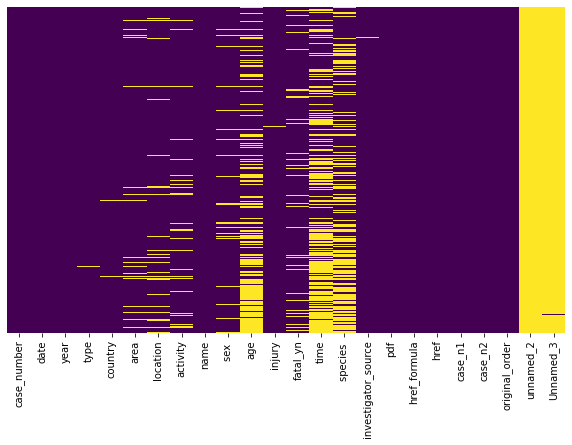

In [205]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna(), # mapa de calor.  muestra los nulos
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();


In [206]:
df.groupby('year').count()


,case_number,date,type,country,area,location,activity,name,sex,age,...,species,investigator_source,pdf,href_formula,href,case_n1,case_n2,original_order,unnamed_2,Unnamed_3
year,,,,,,,,,,,,,,,,,,,,,
0.0,75,75,75,71,60,55,63,75,71,7,...,22,75,75,75,75,75,75,75,0,0
1543.0,1,1,1,1,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
1554.0,1,1,1,1,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,0,0
1617.0,1,1,1,1,1,1,0,1,0,0,...,0,1,1,1,1,1,1,1,0,0
1637.0,1,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,98,98,98,97,89,88,95,98,91,64,...,69,98,98,98,98,98,98,98,0,0
2015.0,124,124,124,124,117,119,120,124,122,100,...,93,124,124,124,124,124,124,124,0,0
2016.0,94,94,94,94,89,88,91,94,92,73,...,59,93,94,94,94,94,94,94,0,0


In [207]:
data['year'] = data['year'].astype('object')
data['year'].dtype
df.groupby('year').count()
#df.year

,case_number,date,type,country,area,location,activity,name,sex,age,...,species,investigator_source,pdf,href_formula,href,case_n1,case_n2,original_order,unnamed_2,Unnamed_3
year,,,,,,,,,,,,,,,,,,,,,
0.0,75,75,75,71,60,55,63,75,71,7,...,22,75,75,75,75,75,75,75,0,0
1543.0,1,1,1,1,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
1554.0,1,1,1,1,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,0,0
1617.0,1,1,1,1,1,1,0,1,0,0,...,0,1,1,1,1,1,1,1,0,0
1637.0,1,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,98,98,98,97,89,88,95,98,91,64,...,69,98,98,98,98,98,98,98,0,0
2015.0,124,124,124,124,117,119,120,124,122,100,...,93,124,124,124,124,124,124,124,0,0
2016.0,94,94,94,94,89,88,91,94,92,73,...,59,93,94,94,94,94,94,94,0,0


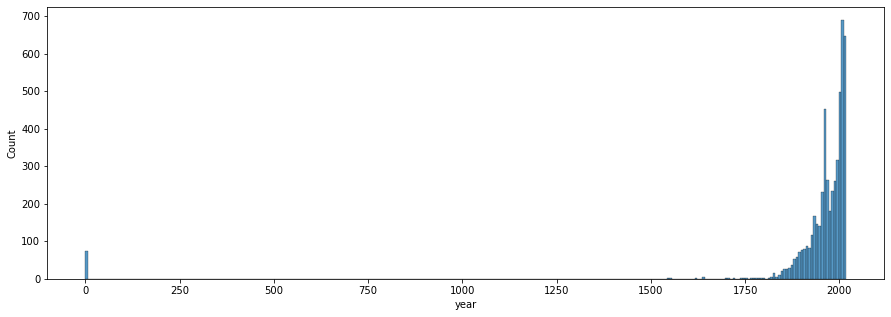

In [208]:
plt.figure(figsize = (15,5))
sns.histplot(data=df, x="year")
plt.show()

In [209]:
df = df.loc[df['year'] > 1900,:]   #casi toda la información se concentra en registros del S.XX. Con el loc se encuentra y se chopea
table = df.groupby('year').count()
table.head()

,case_number,date,type,country,area,location,activity,name,sex,age,...,species,investigator_source,pdf,href_formula,href,case_n1,case_n2,original_order,unnamed_2,Unnamed_3
year,,,,,,,,,,,,,,,,,,,,,
1901.0,7,7,7,7,7,7,7,7,7,3,...,2,7,7,7,7,7,7,7,0,0
1902.0,11,11,11,11,11,11,9,11,11,3,...,2,11,11,11,11,11,11,11,0,0
1903.0,8,8,8,8,7,7,7,8,8,1,...,2,8,8,8,8,8,8,8,0,0
1904.0,12,12,12,12,10,9,12,12,12,2,...,1,12,12,12,12,12,12,12,0,0
1905.0,14,15,15,15,15,15,15,15,13,6,...,7,15,15,15,15,15,15,15,0,0


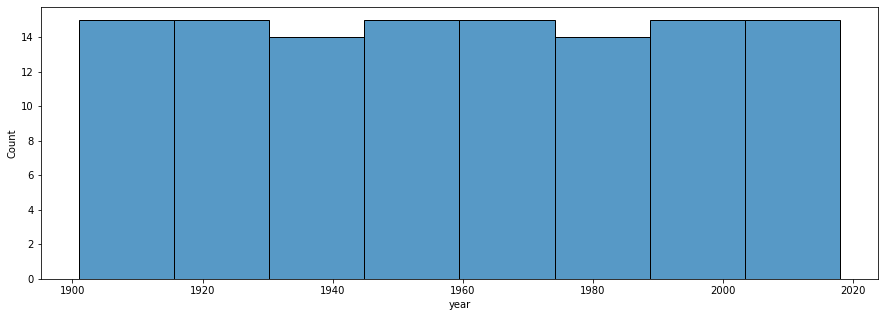

In [210]:
plt.figure(figsize = (15,5))   #nuevo cuadro cortado, desde el S.XX hasta 2018 (que no hay más datos)
sns.histplot(data = table, x = 'year')
plt.show()

In [211]:
#Para borrar filas DESPUÉS
#cols=['id', 'host_id', 'host_name'
#airbnb.drop(cols, axis=1, inplace=True)